In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from scipy.stats import beta

# Set Seaborn style
sns.set(style="whitegrid")

In [171]:
def equations(vars, alpha, beta, k):
    delta, theta = vars
    mu = alpha / (alpha + beta)
    var = (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1))

    eq1 = theta - mu
    eq2 = (theta * (1 - theta) * delta ** 2) / (2 * k + delta ** 2) - var

    return [eq1, eq2]

def simulate_jacobi_process(k, theta, delta, T, dt, initial_value):
    N = int(T / dt)  # Number of steps
    t = np.linspace(0, T, N)
    y = np.zeros(N)
    y[0] = initial_value

    for i in range(1, N):
        y_t = y[i-1]
        drift = k * (theta - y_t) * dt
        diffusion = delta * np.sqrt(y_t * (1 - y_t) * dt) * np.random.normal()
        y[i] = y_t + drift + diffusion

        # Ensure that the process stays within the bounds [0, 1]
        if y[i] < 0:
            y[i] = 0
        elif y[i] > 1:
            y[i] = 1

    return t, y


In [172]:
path = r'C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\Paper 01 - DIPU\Estimation\wind\clusterOnshore'

cluster_0 = pd.read_csv(path + r"\cluster_0.csv")

# Convert the timestamp to a date format
cluster_0['date'] = pd.to_datetime(cluster_0['Unnamed: 0'])

# Extract the "electricity" column
electricity_data = cluster_0['electricity']

# Reshape the data for fitting
electricity_data = electricity_data[(electricity_data > 0) & (electricity_data < 1)]

# Provide initial parameter guesses
initial_alpha = 1
initial_beta = 1

# Fit a Beta distribution to the normalized data with initial guesses
alpha, beta_params, loc, scale = beta.fit(electricity_data, floc=0, fscale=1, loc=initial_alpha, scale=initial_beta)

# Generate values for the Beta distribution
x = np.linspace(0, 1, 1000)
pdf_beta = beta.pdf(x, alpha, beta_params, loc, scale)

# # Plot the histogram of the data and the fitted Beta distribution
# plt.figure(figsize=(10, 6))
# sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
# plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')
# plt.title('Fitting Beta Distribution to Normalized Electricity Data - cluster_0')
# plt.xlabel('Normalized Electricity')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

# Print the parameters of the fitted Beta distribution
print("Beta Distribution Parameters:")
print("Alpha:", alpha)
print("Beta:", beta_params)
print("Location:", loc)
print("Scale:", scale)

Beta Distribution Parameters:
Alpha: 1.0334011157234966
Beta: 2.7816669985770073
Location: 0
Scale: 1


In [173]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Cluster', 'Alpha', 'Beta'])

# Iterate through files in the directory
for filename in os.listdir(path):
    if filename.startswith("cluster") and filename.endswith(".csv"):
        # Read the CSV file
        cluster_df = pd.read_csv(os.path.join(path, filename))

        # Extract the "electricity" column
        electricity_data = cluster_df['electricity']


        # Reshape the data for fitting
        s = electricity_data.mean() # squeezer
        electricity_data = (electricity_data*(len(electricity_data)-1)+s)/len(electricity_data)
        # electricity_data = electricity_data[(electricity_data > 0) & (electricity_data < 1)]

        # Provide initial parameter guesses
        initial_alpha = 1
        initial_beta = 1

        # Fit a Beta distribution to the normalized data with initial guesses
        alpha, beta_params, loc, scale = beta.fit(electricity_data, floc=0, fscale=1, loc=initial_alpha, scale=initial_beta)

        # Create a DataFrame with the current result
        result_df = pd.DataFrame({'Cluster': [filename], 'Alpha': [alpha], 'Beta': [beta_params], 'Mean': np.array(electricity_data).mean() , 'Sd': np.array(electricity_data).std()})

        # Concatenate the current result to the main results DataFrame
        results_df = pd.concat([results_df, result_df], ignore_index=True)

        # Generate values for the Beta distribution and plot
        x = np.linspace(0, 1, 1000)
        pdf_beta = beta.pdf(x, alpha, beta_params, loc, scale)

        # plt.figure(figsize=(10, 6))
        # sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
        # plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')
        # plt.title(f'Fitting Beta Distribution to Normalized Electricity Data - {filename}')
        # plt.xlabel('Normalized Electricity')
        # plt.ylabel('Density')
        # plt.legend()
        # plt.show()

# Print the DataFrame with results
print(results_df)


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_3424\3899981532.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, result_df], ignore_index=True)


           Cluster     Alpha      Beta      Mean        Sd
0    cluster_0.csv  1.033190  2.781277  0.264298  0.203716
1    cluster_1.csv  1.069259  4.524215  0.186562  0.157840
2   cluster_10.csv  0.995267  3.884391  0.197884  0.171547
3   cluster_11.csv  1.080500  3.853150  0.213676  0.173390
4   cluster_12.csv  1.025559  4.467480  0.181827  0.157903
5   cluster_13.csv  0.938954  4.514133  0.165773  0.157303
6   cluster_14.csv  1.003671  3.867423  0.199895  0.172289
7   cluster_15.csv  0.947668  3.619710  0.200663  0.176761
8   cluster_16.csv  0.989672  2.067939  0.315955  0.232051
9   cluster_17.csv  1.050303  4.483317  0.184925  0.158326
10  cluster_18.csv  1.044221  1.488467  0.408045  0.261014
11  cluster_19.csv  1.099296  3.771176  0.220222  0.176101
12   cluster_2.csv  0.997704  4.802912  0.166569  0.152165
13  cluster_20.csv  0.888241  4.929568  0.147139  0.146584
14  cluster_21.csv  1.093253  4.553772  0.188916  0.158132
15  cluster_22.csv  0.935654  5.259645  0.145392  0.1428

In [174]:
# Initialize an empty DataFrame to store results

aggregated_factor = {}

for filename in os.listdir(path):
    if filename.startswith("cluster") and filename.endswith(".csv"):
        cluster_df = pd.read_csv(os.path.join(path, filename))
        aggregated_factor[filename] = cluster_df['electricity']

all_electricity_df = pd.DataFrame(aggregated_factor)
mean_series = all_electricity_df.mean(axis=1)

# Reshape the data for fitting
s = mean_series.mean() # squeezer
mean_series = (mean_series*(len(mean_series)-1)+s)/len(mean_series)

print("Moyenne: ", mean_series.mean())
print("Std: ", mean_series.std())

Moyenne:  0.19898096107055963
Std:  0.1442761566264798


1.6316829084681501 6.379326322858144


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_3424\364764396.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_series, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_3424\364764396.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


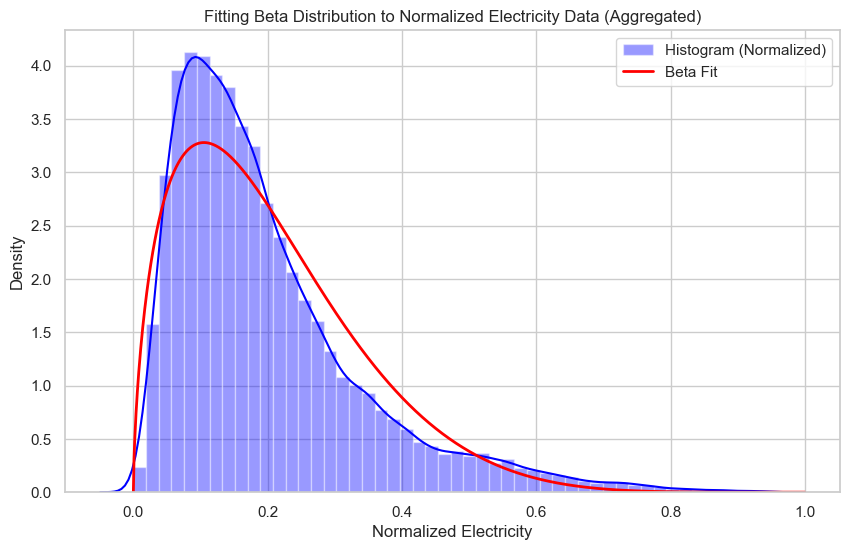

In [175]:
# Provide initial parameter guesses
initial_alpha = 1
initial_beta = 1

# Fit a Beta distribution to the normalized data with initial guesses
alpha_fit, beta_fit, loc, scale = beta.fit(mean_series, floc=0, fscale=1, loc=initial_alpha, scale=initial_beta)

print(alpha_fit, beta_fit)

# Generate values for the Beta distribution and plot
x = np.linspace(0, 1, 1000)
pdf_beta = beta.pdf(x, alpha_fit, beta_fit, loc, scale)

plt.figure(figsize=(10, 6))
sns.distplot(mean_series, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')
plt.title(f'Fitting Beta Distribution to Normalized Electricity Data (Aggregated)')
plt.xlabel('Normalized Electricity')
plt.ylabel('Density')
plt.legend()
plt.show()


In [176]:
k = 0.185

# Initial guesses for k and theta
initial_guesses = [0.4, 0.075]  # Initial guess for k and theta

theta_fit, delta_fit = fsolve(equations, initial_guesses, args=(alpha_fit, beta_fit, k))

print("Estimated theta:", theta_fit)
print("Estimated delta:", delta_fit)

Estimated theta: 0.21491030768492866
Estimated delta: 0.2036800684347745


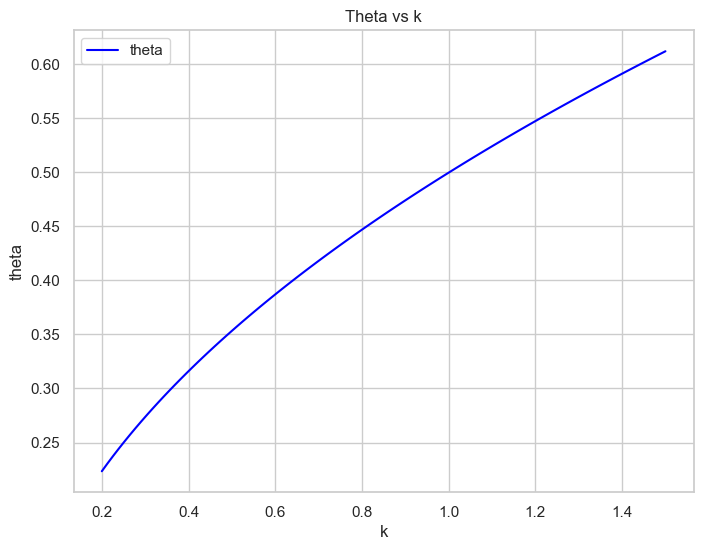

In [177]:
# Initialize lists to store results
k_values = np.linspace(0.2, 1.5, 101)
theta_values = []
delta_values = []

# Loop over different values of k
for k in k_values:
    # Initial guesses for delta and theta
    initial_guesses = [0.4, 0.075]

    # Solve the equations
    solution = fsolve(equations, initial_guesses, args=(alpha_fit, beta_fit, k))
    theta, delta = solution

    theta_values.append(theta)
    delta_values.append(delta)

    initial_guesses = solution

plt.figure(figsize=(8, 6))
plt.plot(k_values, theta_values, label='theta', color='blue')
plt.xlabel('k')
plt.ylabel('theta')
plt.title('Theta vs k')
plt.legend()
plt.grid(True)
plt.show()


In [178]:
# Parameters
k = 0.185
T = 52608
dt = 1  # Time step in hours
initial_value = mean_series[0]  # Initial value of the process

print(theta_fit)


0.21491030768492866


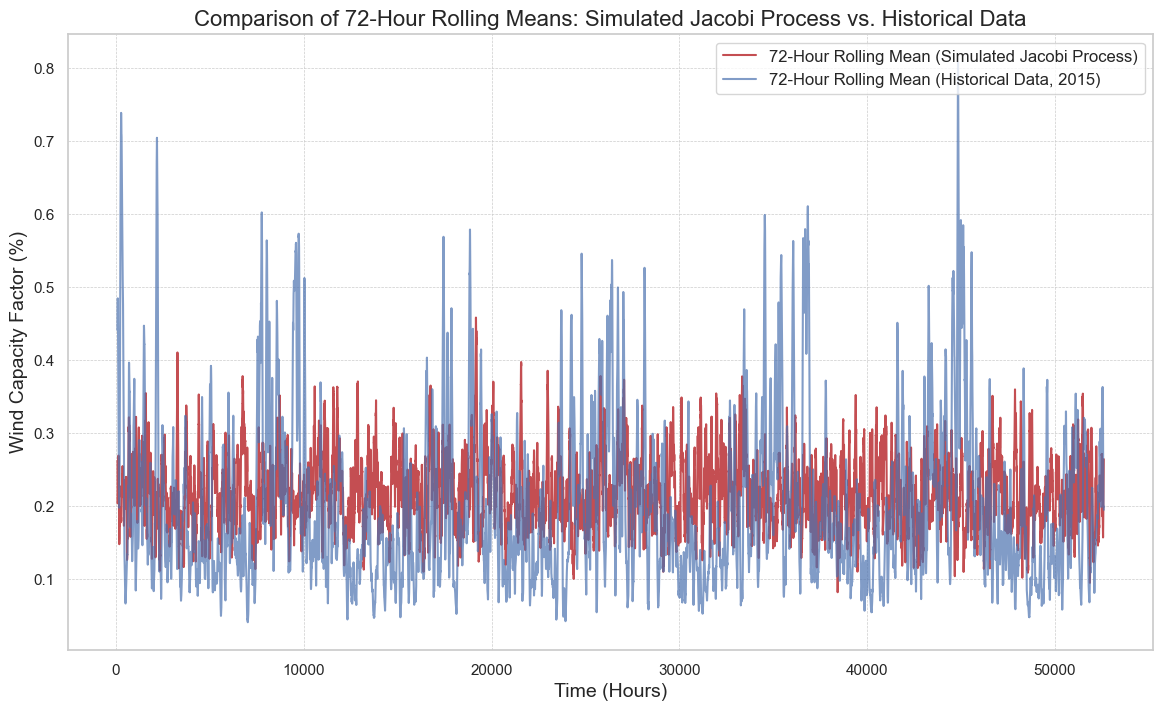

In [179]:
# Simulate the Jacobi process
t, y = simulate_jacobi_process(k, theta_fit, delta_fit, T, dt, initial_value)

# Create a DataFrame for rolling window calculation
df = pd.DataFrame({'time': t, 'value_jacobi': y, 'value_histo': mean_series})


# Increase the size of the rolling window to 72 hours (3 days)
rolling_window_size = 72
rolling_mean_j = df['value_jacobi'].rolling(window=rolling_window_size).mean()
rolling_mean_h = df['value_histo'].rolling(window=rolling_window_size).mean()

# Plot the simulated series and the rolling mean
plt.figure(figsize=(14, 8))

# Plot the 72-hour rolling means
sns.lineplot(x=df['time'], y=rolling_mean_j, label='72-Hour Rolling Mean (Simulated Jacobi Process)', color='r')
sns.lineplot(x=df['time'], y=rolling_mean_h, label='72-Hour Rolling Mean (Historical Data, 2015)', color='b', alpha=0.7)

# Add labels and title
plt.xlabel('Time (Hours)', fontsize=14)
plt.ylabel('Wind Capacity Factor (%)', fontsize=14)
plt.title('Comparison of 72-Hour Rolling Means: Simulated Jacobi Process vs. Historical Data', fontsize=16)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()
